In [1]:
import time
import random
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore") 

In [2]:
os.chdir("C:\\Users\\Admin\\Desktop\\Training\\DSP31\\Python\\Treebased")

In [3]:
data=pd.read_csv("rf_bank.csv")

In [4]:
data.columns

Index(['Unnamed: 0', 'age', 'balance', 'duration', 'campaign', 'previous',
       'default_cat', 'housing_cat', 'loan_cat', 'deposit_cat', 'recent_pdays',
       'job_blue-collar', 'job_entrepreneur', 'job_other', 'job_pink-collar',
       'job_self-employed', 'job_technician', 'job_white-collar',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'poutcome_failure', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [5]:
X=data.drop(columns=["deposit_cat",'Unnamed: 0'], axis=1)

In [6]:
y=data.deposit_cat

In [44]:
X_train,X_test,y_train, y_test=train_test_split(X,y,  test_size = 0.2, random_state = 50)

Bagging :- bootstrap aggregating or bagging is a method of selecting a random number of 
    samples from the original set with replacement. In feature bagging the original feature 
    set is randomly sampled and passed onto different trees (without replacement since having 
    redundant features makes no sense). This is done to decrease the correlation among trees. 
    A feature with unmatched great importance will cause every decision tree to choose it for 
    the first and possible consequent splits, this will make all the trees behave similarly and 
    ultimately more correlated which is undesirable. Our aim here is to make highly uncorrelated 
    decision trees.

Aggregation: - The core concept that makes random forests better than decision trees is 
    aggregating uncorrelated trees. The idea is to create several crappy model trees 
    (low depth) and average them out to create a better random forest. Mean of some random 
    errors is zero hence we can expect generalized predictive results from our forest. 
    In case of regression we can average out the prediction of each tree (mean) while in 
    case of classification problems we can simply take the majority of the class voted by 
    each tree (mode).

n_trees : number of uncorrelated trees we ensemble to create the random forest.

n_features: the number of features to sample and pass onto each tree, this is where feature 
        bagging happens. It can either be sqrt, log2 or an integer. In case of sqrt, the number of 
        features sampled to each tree is square root of total features and log base 2 of total features in case of log2

sample_size: the number of rows randomly selected and passed onto each tree. 
    This is usually equal to total number of rows but can be reduced to increase performance 
    and decrease correlation of trees in some cases (bagging of trees is a completely separate 
                                                     machine learning technique)

depth: depth of each decision tree. Higher depth means more number of splits which increases the 
    over fitting tendency of each tree but since we are aggregating several uncorrelated trees, 
    over fitting of individual trees hardly bothers the whole forest

min_leaf: minimum number of rows required in a node to cause further split. 
    Lower the min_leaf, higher the depth of the tree

n_estimators: This parameter defines the number of trees in the random forest. 
    We will start with n_estimator=20 to see how our algorithm performs.

n_estimators : Number of trees in forest. Default is 10.
    
criterion: “gini” or “entropy” same as decision tree classifier.
    
min_samples_split: minimum number of working set size at node required to split. Default is 2.

In [8]:
model = RandomForestClassifier()  # with default arguments 

In [9]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [11]:
fi

,feature,importance
2,duration,0.394132
1,balance,0.131308
0,age,0.121591
3,campaign,0.051185
8,recent_pdays,0.048372
24,poutcome_success,0.042651
6,housing_cat,0.032921
4,previous,0.029224
7,loan_cat,0.012452
21,education_tertiary,0.011603


In [33]:
fi.to_csv("var_imp3.csv")

In [40]:
model.score(X_train, y_train)

0.8070332624034047

In [41]:
model.score(X_test, y_test)

0.7931034482758621

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
y_pred = rf.predict(X_test)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9995737425404945

#### N_estimators


n_estimators represents the number of trees in the forest. 
Usually the higher the number of trees the better to learn the data. 
However, adding a lot of trees can slow down the training process considerably, 
therefore we do a parameter search to find the sweet spot.

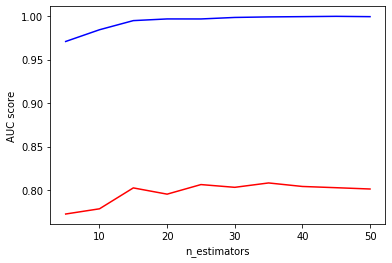

In [14]:

n_estimators = [5,10,15,20,25,30,35,40,45,50 ]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(n_estimators, train_results,"b" , label="Train AUC")
line2 = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

##### max_depth

max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. We fit each decision tree with depths ranging from 1 to 32 and plot the training and test errors

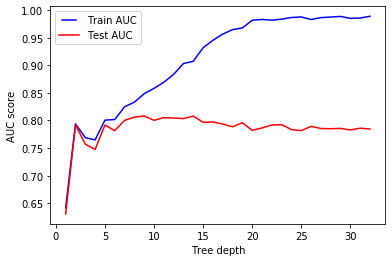

In [15]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

##### min_samples_split

min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

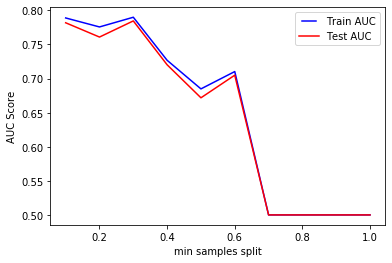

In [16]:

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("min samples split")
plt.show()

##### min_samples_leaf

min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree

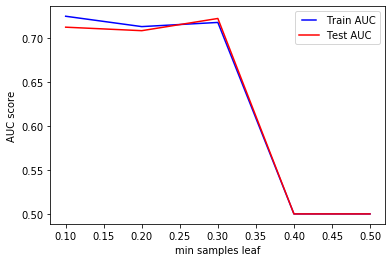

In [17]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

##### max_features

max_features represents the number of features to consider when looking for the best split.

In [19]:
X_train.shape

(8929, 26)

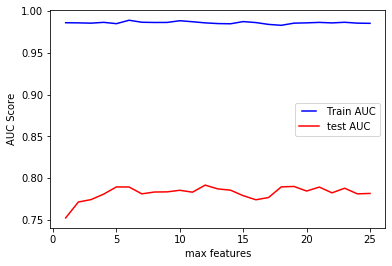

In [18]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results,"b", label="Train AUC")
line2, = plt.plot(max_features, test_results, "r", label="test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("max features")
plt.show()


In [23]:
fit_rf1 = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=5, min_samples_leaf=0.25, min_samples_split=0.1)
fit_rf1.fit(X_train, y_train)
train_pred = fit_rf1.predict(X_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
roc_auc1 = auc(false_positive_rate, true_positive_rate)
y_pred = fit_rf1.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc2 = auc(false_positive_rate, true_positive_rate)
print("Train", roc_auc1)
print("Test", roc_auc2)

Train 0.6604828614983673
Test 0.6583980762116167


In [24]:
7*5*9*2*4*2*10

50400

In [26]:
fit_rf = RandomForestClassifier(random_state=42)
start = time.time()
param_dist = {'max_depth':[5,6,8,10],
              'min_samples_split':[2,4,6,10],
              'n_estimators':[1, 2, 4, 8, 16],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = -1, verbose=1)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  8.5min finished


Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 16}
Time taken in grid search:  508.56


In [27]:
cv_rf.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 10,
 'n_estimators': 16}

In [28]:
cv_rf.best_score_

0.8152088699742412

In [45]:
X_train,X_test,y_train, y_test=train_test_split(X,y,  test_size = 0.2, random_state = 50)

model = RandomForestClassifier(n_estimators=16, 
                               bootstrap=False, criterion='entropy',
                               min_samples_split=10,
                               max_depth=10, max_features='auto')
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=16,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
y_pred_train =model.predict(X_train)
y_pred_test =model.predict(X_test)

In [47]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78      4700
           1       0.81      0.59      0.68      4229

    accuracy                           0.74      8929
   macro avg       0.76      0.73      0.73      8929
weighted avg       0.76      0.74      0.73      8929



In [48]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74      1173
           1       0.75      0.52      0.61      1060

    accuracy                           0.69      2233
   macro avg       0.70      0.68      0.67      2233
weighted avg       0.70      0.69      0.68      2233



In [34]:
# 1. Noise - Variables , Data related 
# 2. Parametrs 
# 3. Algorithms
# 4. Low data

In [36]:
cv_rf.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 10,
 'n_estimators': 16}

In [37]:
# param_dist = {'max_depth':[5,6,8,10],
#               'min_samples_split':[2,4,6,10],
#               'n_estimators':[1, 2, 4, 8, 16],
#               'bootstrap': [True, False],
#               'max_features': ['auto', 'sqrt', None],
#               'criterion': ['gini', 'entropy']}

In [39]:
pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

,feature,importance
2,duration,0.520772
8,recent_pdays,0.072206
24,poutcome_success,0.064813
0,age,0.055579
6,housing_cat,0.053639
1,balance,0.049658
25,poutcome_unknown,0.030031
3,campaign,0.029636
4,previous,0.027206
11,job_other,0.016368


In [49]:
X=data.drop(columns=["deposit_cat",'Unnamed: 0', "duration"], axis=1)
y=data.deposit_cat
X_train,X_test,y_train, y_test=train_test_split(X,y,  test_size = 0.2, random_state = 50)

model = RandomForestClassifier(n_estimators=16, 
                               bootstrap=False, criterion='entropy',
                               min_samples_split=10,
                               max_depth=10, max_features='auto')
model.fit(X_train, y_train)
y_pred_train =model.predict(X_train)
y_pred_test =model.predict(X_test)

In [41]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.71      0.88      0.78      4700
           1       0.81      0.60      0.69      4229

    accuracy                           0.74      8929
   macro avg       0.76      0.74      0.73      8929
weighted avg       0.76      0.74      0.74      8929



In [42]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.83      0.73      1173
           1       0.74      0.52      0.61      1060

    accuracy                           0.68      2233
   macro avg       0.70      0.68      0.67      2233
weighted avg       0.69      0.68      0.68      2233



In [43]:
pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

,feature,importance
23,poutcome_success,0.153372
0,age,0.127518
1,balance,0.121627
7,recent_pdays,0.107687
5,housing_cat,0.095898
2,campaign,0.063347
24,poutcome_unknown,0.061534
3,previous,0.057827
22,poutcome_failure,0.033714
10,job_other,0.030765


In [51]:
fit_rf = RandomForestClassifier(random_state=42)
start = time.time()
param_dist = {'max_depth':[5,6,8,10],
              'min_samples_split':[2,4,6,10],
              'n_estimators':[15,20,25,30,35,40],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = -1, verbose=1)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 30.6min finished


Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 35}
Time taken in grid search:  1835.67


In [52]:
# param_dist = {'max_depth':[5,6,8,10],
#               'min_samples_split':[2,4,6,10],
#               'n_estimators':[15,20,25,30,35,40],
#               'bootstrap': [True, False],
#               'max_features': ['auto', 'sqrt', None],
#               'criterion': ['gini', 'entropy']}

In [56]:
cv_rf.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_split': 6,
 'n_estimators': 35}

In [54]:
cv_rf.best_score_

0.6904468585507896

In [57]:
X=data.drop(columns=["deposit_cat",'Unnamed: 0', "duration"], axis=1)
y=data.deposit_cat
X_train,X_test,y_train, y_test=train_test_split(X,y,  test_size = 0.2, random_state = 50)

model = RandomForestClassifier(n_estimators=cv_rf.best_params_["n_estimators"], 
                               bootstrap=cv_rf.best_params_["bootstrap"], 
                               criterion=cv_rf.best_params_["criterion"],
                               min_samples_split=cv_rf.best_params_["min_samples_split"],
                               max_depth=cv_rf.best_params_["max_depth"], 
                               max_features=cv_rf.best_params_["max_features"])
model.fit(X_train, y_train)
y_pred_train =model.predict(X_train)
y_pred_test =model.predict(X_test)

In [58]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77      4700
           1       0.81      0.53      0.64      4229

    accuracy                           0.72      8929
   macro avg       0.74      0.71      0.71      8929
weighted avg       0.74      0.72      0.71      8929



In [59]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.86      0.74      1173
           1       0.76      0.49      0.60      1060

    accuracy                           0.68      2233
   macro avg       0.70      0.67      0.67      2233
weighted avg       0.70      0.68      0.67      2233



In [60]:
pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

,feature,importance
23,poutcome_success,0.201219
0,age,0.127826
5,housing_cat,0.107041
3,previous,0.096424
1,balance,0.088714
7,recent_pdays,0.078567
24,poutcome_unknown,0.056429
2,campaign,0.047791
10,job_other,0.042342
22,poutcome_failure,0.032494


In [61]:
selected_var=['poutcome_success',
'age',
'housing_cat',
'previous',
'balance',
'recent_pdays',
'poutcome_unknown',
'campaign',
'job_other',
'poutcome_failure',
'marital_single',
'marital_married',
'loan_cat',
'education_tertiary',
'job_blue-collar']

In [62]:

X=X[selected_var]
y=data.deposit_cat
X_train,X_test,y_train, y_test=train_test_split(X,y,  test_size = 0.2, random_state = 50)

model = RandomForestClassifier(n_estimators=cv_rf.best_params_["n_estimators"], 
                               bootstrap=cv_rf.best_params_["bootstrap"], 
                               criterion=cv_rf.best_params_["criterion"],
                               min_samples_split=cv_rf.best_params_["min_samples_split"],
                               max_depth=cv_rf.best_params_["max_depth"], 
                               max_features=cv_rf.best_params_["max_features"])
model.fit(X_train, y_train)
y_pred_train =model.predict(X_train)
y_pred_test =model.predict(X_test)

In [63]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76      4700
           1       0.79      0.55      0.65      4229

    accuracy                           0.72      8929
   macro avg       0.74      0.71      0.71      8929
weighted avg       0.73      0.72      0.71      8929



In [64]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74      1173
           1       0.75      0.52      0.61      1060

    accuracy                           0.69      2233
   macro avg       0.70      0.68      0.68      2233
weighted avg       0.70      0.69      0.68      2233



In [19]:
data=pd.read_csv("rf_bank.csv")
X=data.drop(columns=["deposit_cat"], axis=1)
y=data.deposit_cat
X_train,X_test,y_train, y_test=train_test_split(X,y,  test_size = 0.2, random_state = 50)

model = RandomForestClassifier(n_estimators=16, 
                               bootstrap=False, criterion='entropy',
                               min_samples_split=10,
                               max_depth=10, max_features='auto')
model.fit(X_train, y_train)
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [20]:
fi

,feature,importance
2,duration,0.441047
24,poutcome_success,0.133824
6,housing_cat,0.082861
4,previous,0.076420
8,recent_pdays,0.071275
25,poutcome_unknown,0.044116
0,age,0.036988
1,balance,0.028873
11,job_other,0.019928
23,poutcome_failure,0.013879


In [21]:
model.feature_importances_

array([3.69878349e-02, 2.88734998e-02, 4.41046975e-01, 1.12571205e-02,
       7.64196448e-02, 8.59906172e-05, 8.28608501e-02, 8.08892055e-03,
       7.12746331e-02, 6.69300210e-03, 1.96642875e-04, 1.99281257e-02,
       1.25821032e-04, 1.05817223e-04, 1.25635725e-04, 7.75678894e-05,
       2.12811457e-04, 9.51582363e-03, 7.27966795e-03, 7.64879634e-04,
       6.67184497e-04, 5.47227895e-03, 1.20824442e-04, 1.38785918e-02,
       1.33823699e-01, 4.41161572e-02])

In [22]:
model.score(X_train,y_train)

0.8077052301489529

In [23]:
model.score(X_test,y_test) 

0.793551276309897

In [24]:
import sklearn.metrics as m

In [25]:
y_train_pred=model.predict(X_train)

In [27]:
print(m.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      4700
           1       0.81      0.78      0.79      4229

    accuracy                           0.81      8929
   macro avg       0.81      0.81      0.81      8929
weighted avg       0.81      0.81      0.81      8929



In [ ]:
y_pred=model.predict(X_test)
X_test["p_1"]=model.predict_proba(X_test)[:,1]
X_test["y_actual"]=y_test
X_test["y_pred"]=y_pred
X_test["Rank"]=pd.qcut(X_test["p_1"], 10, labels=np.arange(0,10,1))
X_test["Numb"]=10
X_test["Decile"]=X_test["Numb"]-X_test["Rank"].astype("int")
profiletest=pd.DataFrame(X_test.groupby("Decile").apply(lambda x:pd.Series({
    "min_score"  :x["p_1"].min(),
    "max_score"  :x["p_1"].max(),
    "Event"      :x["y_actual"].sum(),
    "Non_event"  :x["y_actual"].count()-x["y_pred"].sum(),
    "Total"      :x["y_actual"].count()
})))